In [ ]:
import numpy as np

# Step Activation Function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron Model
class Perceptron:
    def __init__(self, input_size, learning_rate=0.5, epochs=50, weights=None, bias=None):

        if weights is not None:
            self.weights = np.array(weights)
        else:
            self.weights = np.random.rand(input_size)

        if bias is not None:
            self.bias = bias
        else:
            self.bias = np.random.rand(1)[0]

        self.learning_rate = learning_rate
        self.epochs = epochs

    # Predict output for given inputs
    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights) + self.bias
        return step_function(linear_output)

    # Train the model
    def train(self, X, y):
        for epoch in range(self.epochs):
            all_correct = True  # Flag to track if all predictions are correct
            print(f"\nEpoch {epoch + 1}")
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction

                # Update weights and bias
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

                # Print current weights, bias, and output prediction (formatted to 2 decimal places)
                print(f"Input: {inputs}, Predicted Output: {prediction}, Actual Output: {target}, "
                      f"Weights: {np.round(self.weights, 2)}, Bias: {round(self.bias, 2)}")

                # If there's an error, set all_correct to False
                if error != 0:
                    all_correct = False

            # If all predictions were correct, exit early
            if all_correct:
                print(f"\nTraining complete after epoch {epoch + 1} (All predictions correct).")
                break

# Dataset: XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs for XOR gate
y = np.array([0, 1, 1, 0])  # Corresponding outputs for XOR gate

# User input for initial weights and bias
input_weights = [float(x) for x in input("Enter initial weights (comma separated): ").split(",")]
input_bias = float(input("Enter initial bias: "))

# Initialize and train the perceptron with manual weights and bias
perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=50, weights=input_weights, bias=input_bias)
perceptron.train(X, y)

# Test the perceptron
print("\nTesting XOR Gate Perceptron:")
for inputs in X:
    output = perceptron.predict(inputs)
    print(f"Input: {inputs}, Predicted Output: {output}")


Enter initial weights (comma separated): 0.6,1.2
Enter initial bias: -0.5

Epoch 1
Input: [0 0], Predicted Output: 0, Actual Output: 0, Weights: [0.6 1.2], Bias: -0.5
Input: [0 1], Predicted Output: 1, Actual Output: 1, Weights: [0.6 1.2], Bias: -0.5
Input: [1 0], Predicted Output: 1, Actual Output: 1, Weights: [0.6 1.2], Bias: -0.5
Input: [1 1], Predicted Output: 1, Actual Output: 0, Weights: [0.5 1.1], Bias: -0.6

Epoch 2
Input: [0 0], Predicted Output: 0, Actual Output: 0, Weights: [0.5 1.1], Bias: -0.6
Input: [0 1], Predicted Output: 1, Actual Output: 1, Weights: [0.5 1.1], Bias: -0.6
Input: [1 0], Predicted Output: 0, Actual Output: 1, Weights: [0.6 1.1], Bias: -0.5
Input: [1 1], Predicted Output: 1, Actual Output: 0, Weights: [0.5 1. ], Bias: -0.6

Epoch 3
Input: [0 0], Predicted Output: 0, Actual Output: 0, Weights: [0.5 1. ], Bias: -0.6
Input: [0 1], Predicted Output: 1, Actual Output: 1, Weights: [0.5 1. ], Bias: -0.6
Input: [1 0], Predicted Output: 0, Actual Output: 1, Weight

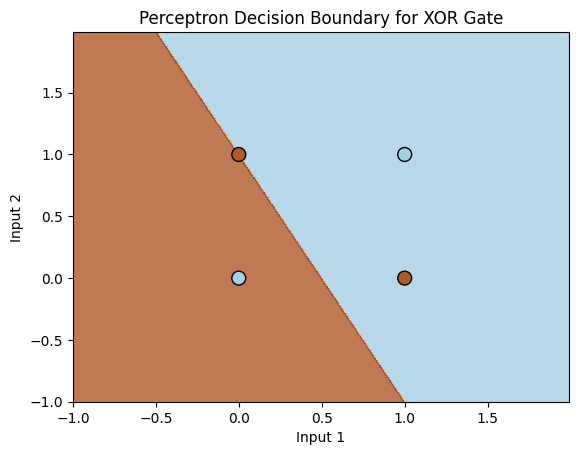

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the decision boundary
def plot_decision_boundary(X, y, perceptron):
    # Create a mesh grid over the input feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the output for each point in the mesh grid
    Z = np.array([perceptron.predict(np.array([x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary using contour plot
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Scatter plot of the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.Paired)

    # Label the plot
    plt.title("Perceptron Decision Boundary for XOR Gate")
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')

    # Display the plot
    plt.show()

# Call the plotting function to visualize the decision boundary
plot_decision_boundary(X, y, perceptron)


In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create MLP model with one hidden layer
model = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000)

# Train the model
model.fit(X, y)

# Test the model
predictions = model.predict(X)
print("Testing XOR Gate MLP:")
for inputs, pred in zip(X, predictions):
    print(f"Input: {inputs}, Predicted Output: {pred}")


Testing XOR Gate MLP:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy




In [ ]:
df=pd.read_csv("/content/IMDB - IMDB Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to clean the text data
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply text cleaning to the dataset
df['cleaned_review'] = df['review'].apply(clean_text)

# Encode the labels (positive = 1, negative = 0)
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment_encoded'], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()


In [ ]:
# Build the Sequential model
model = Sequential()

# Input layer and hidden layers
model.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer for binary classification (sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 650,497 (2.48 MB)

 Trainable params: 650,497 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8182 - loss: 0.3814 - val_accuracy: 0.8848 - val_loss: 0.2721
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9137 - loss: 0.2143 - val_accuracy: 0.8872 - val_loss: 0.2720
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9441 - loss: 0.1450 - val_accuracy: 0.8816 - val_loss: 0.3354
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9857 - loss: 0.0456 - val_accuracy: 0.8754 - val_loss: 0.5672
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9984 - loss: 0.0080 - val_accuracy: 0.8731 - val_loss: 0.7681
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.8699 - val_loss: 0.9032
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9986 - loss: 0.0042 - val_accuracy: 0.8722 - val_loss: 0.9518
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9977 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8765 - loss: 1.0952
Test Accuracy: 87.74%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4961
           1       0.87      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



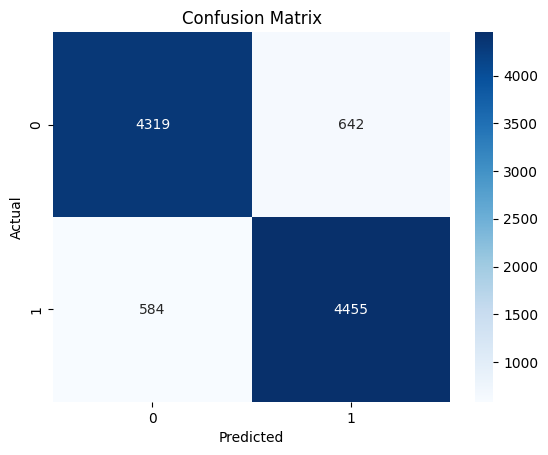

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test)

print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Predict the sentiment of the test set
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")

# Display classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


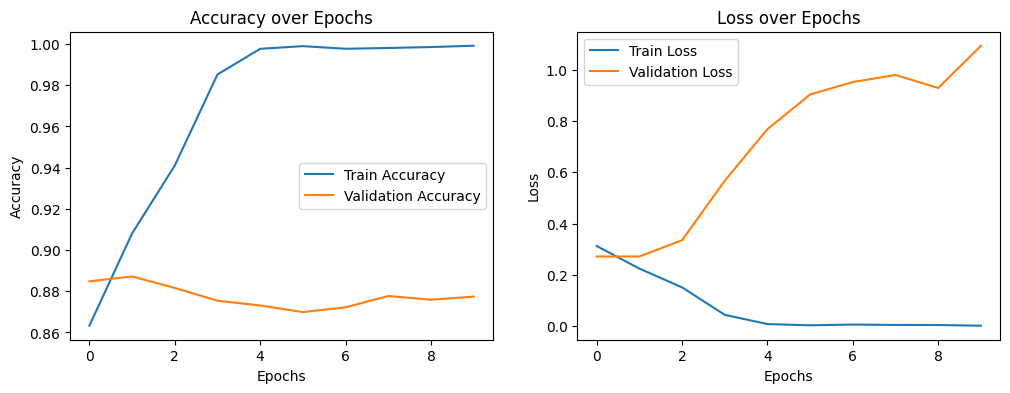

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


ReLU Activation: Rectified Linear Unit (ReLU) is used in the hidden layers because it helps mitigate the vanishing gradient problem and speeds up convergence by introducing non-linearity.

Sigmoid Activation: This is used in the output layer for binary classification since it squashes the output between 0 and 1, which is ideal for predicting probabilities.

Binary Cross-Entropy: This loss function is suitable for binary classification tasks, as it measures the difference between the actual label and the predicted probability for each sample, making it appropriate for this task.